# Map of All Reported Traffic Accidents in Germany 2021-2025


In [1]:
import fetch_data as fd
import geopandas as gpd
import os

In [2]:
df = fd.get_df(2024)
df.head()

,OID_,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,Community_key,UID
0,1,01,0,59,044,2024,5,23,1,3,...,0,0,0,0,525162.3763,6.045497e+06,9.389076,54.556380,01059044,2024_1
1,2,01,0,62,094,2024,5,23,1,3,...,0,0,0,0,600576.0902,5.964744e+06,10.527878,53.821498,01062094,2024_2
2,3,01,0,60,088,2024,5,18,7,3,...,0,1,0,0,574734.0795,5.969977e+06,10.136678,53.872878,01060088,2024_3
3,4,01,0,60,047,2024,5,16,7,3,...,0,0,0,0,567578.5791,5.963042e+06,10.026341,53.811536,01060047,2024_4
4,5,01,0,60,004,2024,5,19,7,3,...,0,0,0,0,561431.0420,5.973290e+06,9.935041,53.904395,01060004,2024_5


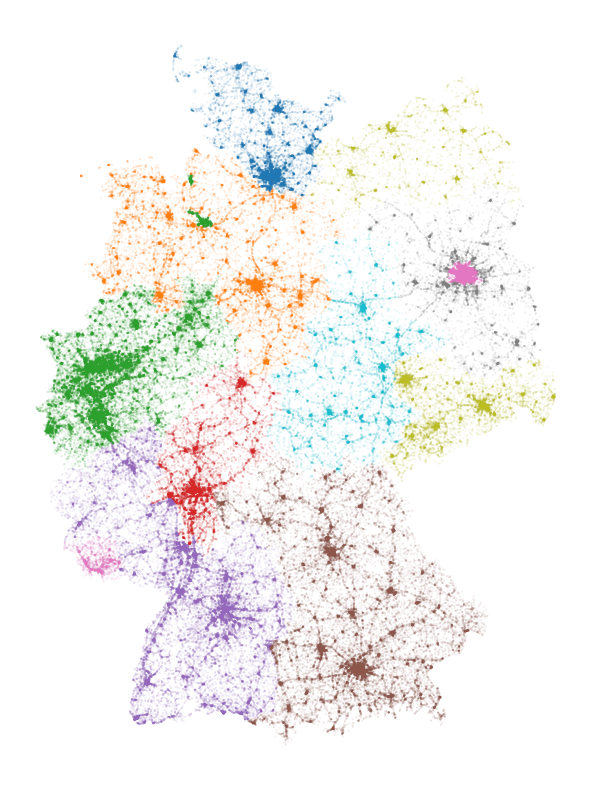

In [ ]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["XGCSWGS84"], df["YGCSWGS84"]),
    crs="WGS84",
)
gdf_plt = gdf.plot(
    markersize=0.1,
    alpha=0.2,
    column="ULAND",
    # legend=show_legend,
    figsize=(15, 15),
)
gdf_plt.set_axis_off()
# save the plot to a file
out_path = os.path.join("img", "de-2024.png")
gdf_plt.get_figure().savefig(out_path, dpi=360, transparent=True)  # type: ignore